In [1]:
import numpy

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

In [2]:
def create_entangled_pair_circuit() -> QuantumCircuit:
    qc = QuantumCircuit(2, 2)

    # Create Bell state |Φ+> = (|00> + |11>) / sqrt(2)
    qc.h(0)
    qc.cx(0, 1)

    # Transform |Φ+> into |ψ-> = (|01> - |10>) / sqrt(2)
    qc.x(1)
    qc.z(1)

    return qc

Measurement circuit (0°, 0°)


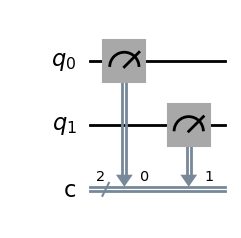

Measurement circuit (-30°, 0°)


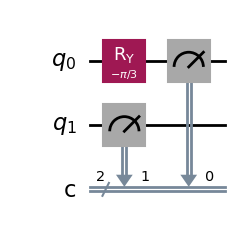

Measurement circuit (0°, 30°)


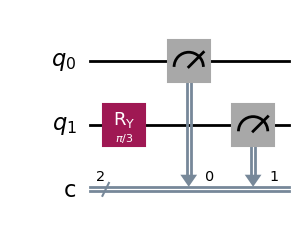

Measurement circuit (-30°, 30°)


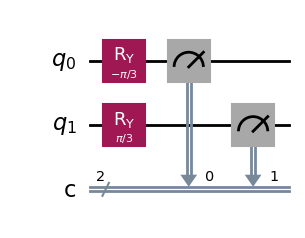

In [3]:
def create_measurement_circuit(angle_a_deg: float, angle_b_deg: float) -> QuantumCircuit:
    qc = QuantumCircuit(2, 2)

    theta_a = numpy.deg2rad(2 * angle_a_deg)
    theta_b = numpy.deg2rad(2 * angle_b_deg)

    if angle_a_deg != 0:
        qc.ry(theta_a, 0)
    if angle_b_deg != 0:
        qc.ry(theta_b, 1)

    qc.measure(0, 0)  # qubit 0 -> classical bit 0 (Alice)
    qc.measure(1, 1)  # qubit 1 -> classical bit 1 (Bob)
    return qc

meas_00   = create_measurement_circuit(0, 0)
meas_m30_0 = create_measurement_circuit(-30, 0)
meas_0_30  = create_measurement_circuit(0, 30)
meas_m30_30 = create_measurement_circuit(-30, 30)

meas_00, meas_m30_0, meas_0_30, meas_m30_30

print("Measurement circuit (0°, 0°)")
display(meas_00.draw("mpl"))

print("Measurement circuit (-30°, 0°)")
display(meas_m30_0.draw("mpl"))

print("Measurement circuit (0°, 30°)")
display(meas_0_30.draw("mpl"))

print("Measurement circuit (-30°, 30°)")
display(meas_m30_30.draw("mpl"))


In [4]:
def generate_random_settings(n: int = 1024, seed: int | None = None) -> tuple[numpy.ndarray, numpy.ndarray]:
    rng = numpy.random.default_rng(seed)
    alice_bits = rng.integers(0, 2, size=n, dtype=numpy.int8)
    bob_bits   = rng.integers(0, 2, size=n, dtype=numpy.int8)
    return alice_bits, bob_bits


# Step 3
alice_settings, bob_settings = generate_random_settings(n=1024, seed=None)

alice_settings[:20], bob_settings[:20]


(array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       dtype=int8),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       dtype=int8))